DATA COLLECTION
```
-> Collect the dataset or create the dataset
```

DATA PREPROCESSING


```
-> Import the libraries.
-> Import the dataset.
-> Check for null values.
-> Data Visualization.
-> Outlier Detection.
-> Splitting Dependent and Independent variables.
-> Encoding.
-> Feature Scaling.
-> Splitting Dataset into Train and Test.

```


MODEL BUILDING
```
-> Import the model building libraries.
-> Initializing the model.
-> Training and testing the model.
-> Evaluation of Model.
-> Save the model.
```


APPLICATION BUILDING
```
-> Create an HTML file.
-> Build a Python code.

```



# MULTI LINEAR REGRESSION

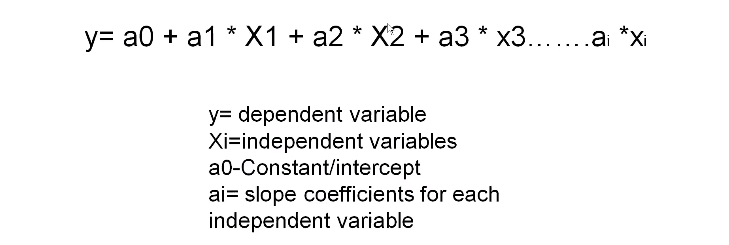

# ***i) DATA PREPROCESSING***

# 1) Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("50_Startups.csv")

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [ ]:
corr = df.corr()
corr

<ipython-input-5-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


In [ ]:
# Correlation bw Marketing Spend and R&D is very high. Not good.
# Will have to fix this with HYPERPARAMETER TUNING

In [ ]:
# Order of correlation of all variables with "Profit"
df.corr().Profit.sort_values(ascending=True)

<ipython-input-7-5ef5815c1549>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Profit.sort_values(ascending=True)


Administration     0.198849
Marketing Spend    0.748957
R&D Spend          0.964770
Profit             1.000000
Name: Profit, dtype: float64

# 3. Checking for null values

In [ ]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.State.nunique()

3

In [ ]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

# 4) Data Visualization

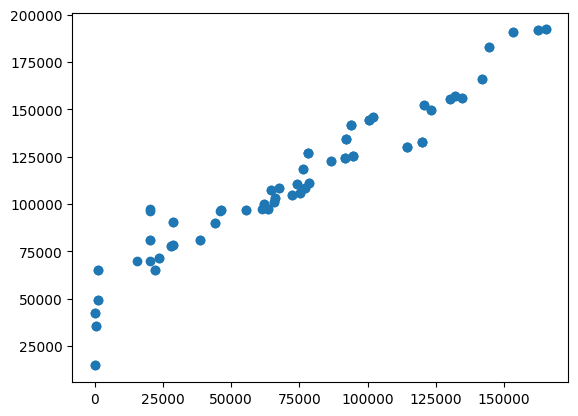

In [ ]:
plt.scatter(df["R&D Spend"], df["Profit"])

<Axes: >

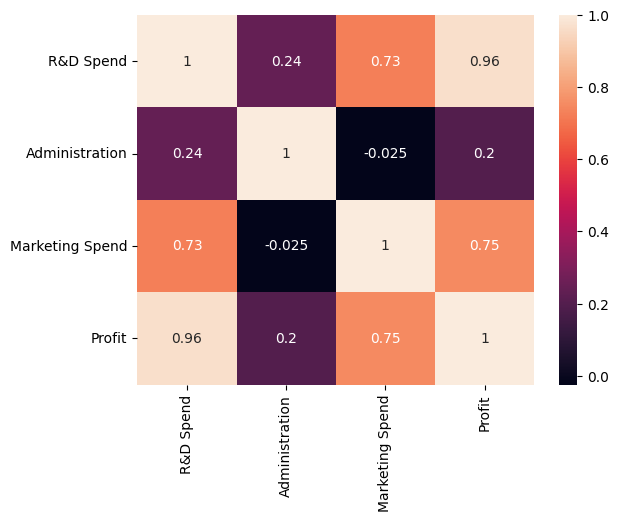

In [ ]:
sns.heatmap(corr, annot = True)

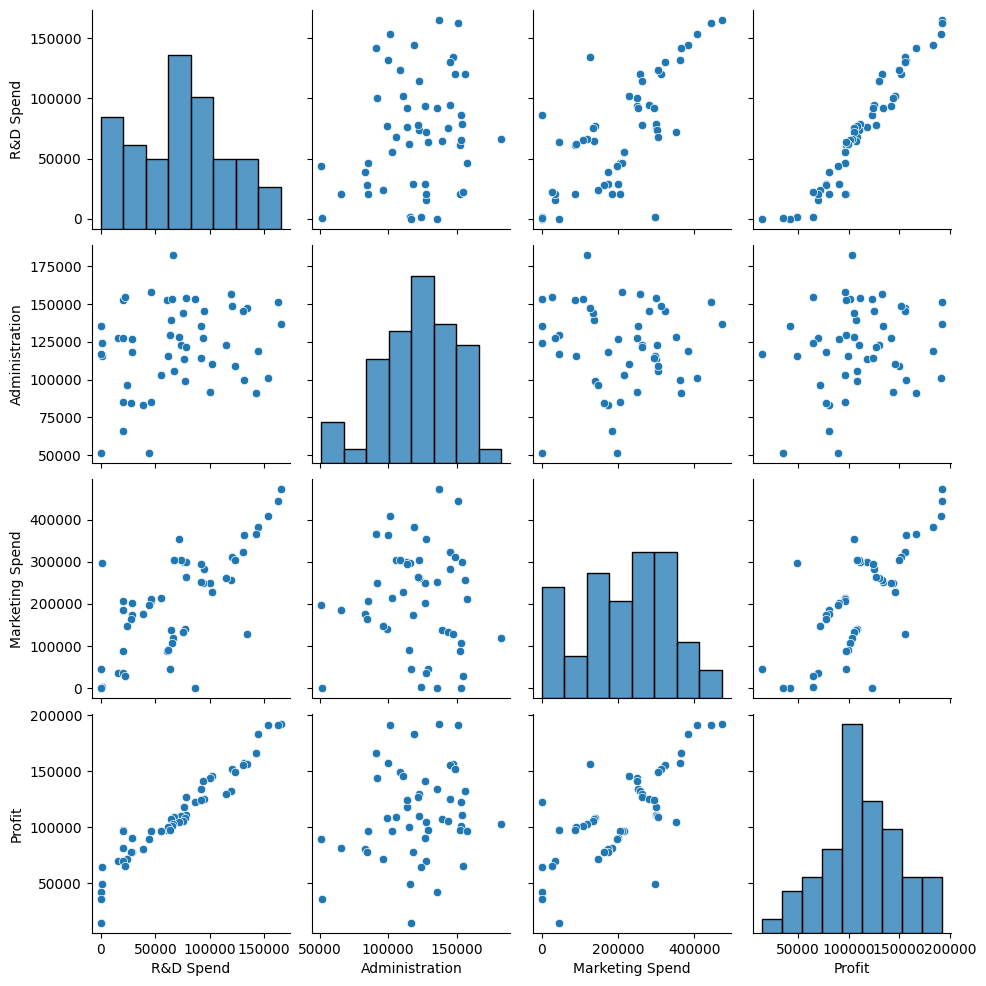

In [ ]:
sns.pairplot(df)

<ipython-input-16-68b4ca790ce0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = df["State"], y = df["Profit"], ci=0)


<Axes: xlabel='State', ylabel='Profit'>

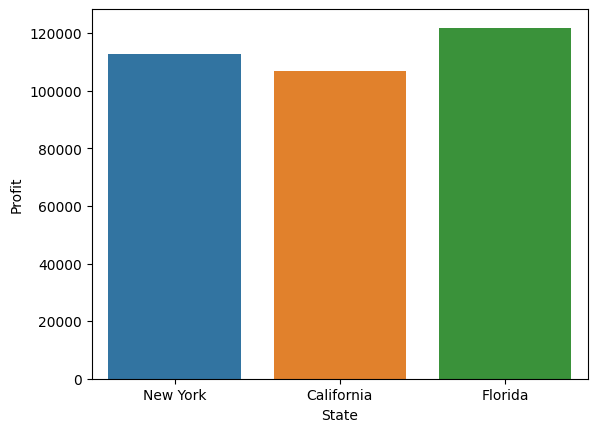

In [ ]:
sns.barplot(x = df["State"], y = df["Profit"], ci=0)

# 5. Outlier Detection

<Axes: >

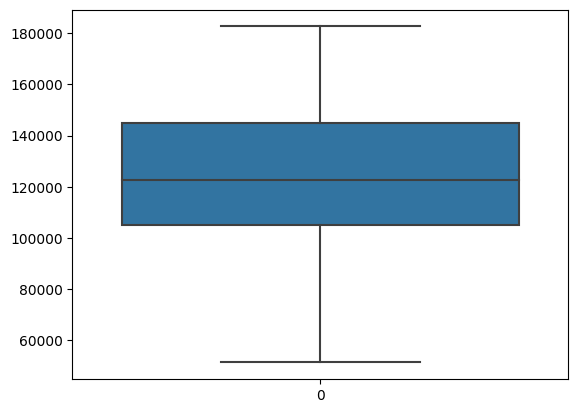

In [ ]:
sns.boxplot(df["Administration"])

<Axes: >

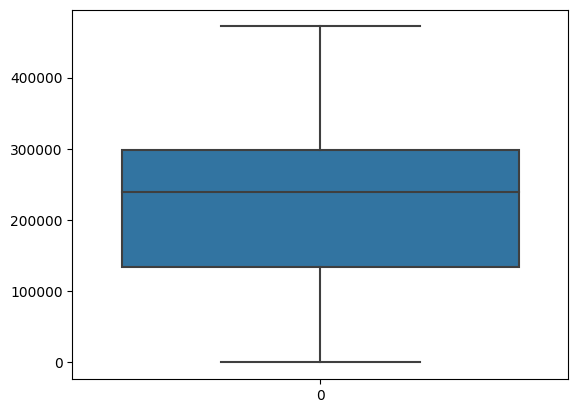

In [ ]:
sns.boxplot(df["Marketing Spend"])

<Axes: >

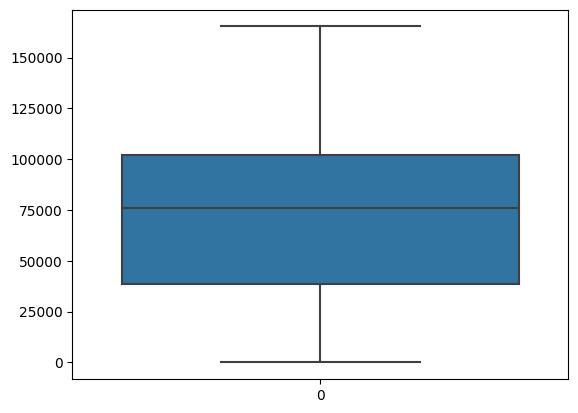

In [ ]:
sns.boxplot(df["R&D Spend"])

<Axes: >

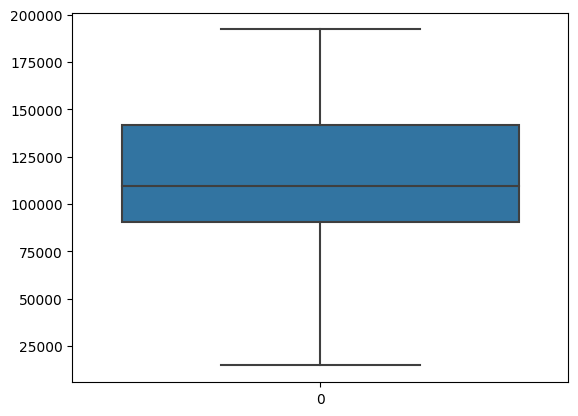

In [ ]:
sns.boxplot(df["Profit"])

# 6. Splitting Dependent and Independent Variable

In [ ]:
# X should be dataframe
# Y should be a series

X = df.drop(columns = "Profit", axis = 1)
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
...,...,...,...,...
103,119943.24,156547.42,256512.92,Florida
104,114523.61,122616.84,261776.23,New York
105,78013.11,121597.55,264346.06,California
106,94657.16,145077.58,282574.31,New York


In [ ]:
X.shape

(108, 4)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
Y = df["Profit"]

In [ ]:
Y.shape

(108,)

In [ ]:
type(Y)

pandas.core.series.Series

# 7. Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
le = LabelEncoder()

In [ ]:
X["State"] = le.fit_transform(X["State"])

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
print(le.classes_)

['California' 'Florida' 'New York']


In [ ]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'California': 0, 'Florida': 1, 'New York': 2}

# 8. Feature Scaling

```
STANDARD SCALER
mean = 0, SD = 1

MINMAX SCALER
range bw 0 to 1
```



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms = MinMaxScaler()
# applying fit transform on all columns with 1 command
X_Scaled = pd.DataFrame(ms.fit_transform(X), columns = X.columns)

In [ ]:
X_Scaled

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5
...,...,...,...,...
103,0.725394,0.801327,0.543708,0.5
104,0.692617,0.543030,0.554864,1.0
105,0.471808,0.535270,0.560312,0.0
106,0.572468,0.714013,0.598948,1.0


# 9. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, test_size=0.2, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(86, 4) (22, 4) (86,) (22,)


# ***MODEL BUILDING***

# 1. Import the model Building Libraries

In [ ]:
from sklearn.linear_model import LinearRegression

# 2. Initializing the model

In [ ]:
lr = LinearRegression()

# 3. Train the model

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

# 4. Testing the Model

In [ ]:
Y_pred = lr.predict(X_test)
Y_pred

array([ 48379.24868386, 134848.9192467 ,  76483.10965225, 181561.78529188,
       112966.00035112, 134241.68257226, 129222.38731942, 160017.05919784,
       116752.96050775,  46260.9926407 , 102266.36060189, 115568.27177598,
        48379.24868386, 119114.16525526,  88602.22002789, 127101.40273623,
       127101.40273623,  90942.33421515,  58677.7334991 , 146304.26215166,
       149410.05441   , 152502.87810448])

In [ ]:
Y_test

84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
Name: Profit, dtype: float64

In [ ]:
profit = pd.DataFrame(
    {
        "Actual_profit" : Y_test,
        "Predicted_profit" : Y_pred
    }
                      )

In [ ]:
profit

,Actual_profit,Predicted_profit
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


# 4. Random Value Prediction

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
lr.predict([[153241.51, 101545.55, 408134.54, 1]])
# State input converted into numerical value as per encoding. [BW 0-2]
# Observe that the answer is still too huge [i.e predicted Profit value]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.65129822e+10])

In [ ]:
# IMPORTANT
# using minmax scaler transform on the input data to make it understandable by the lr model
lr.predict(ms.transform([[153241.51, 101545.55, 408134.54, 1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([181408.49228078])

# 5. Evaluation of Model

In [ ]:
from sklearn import metrics

In [ ]:
# R-square
# evaluating testing accuracy
print(metrics.r2_score(Y_test,Y_pred))

0.9258962347553817


In [ ]:
# mean squared error
print(metrics.mean_squared_error(Y_test,Y_pred))

96015241.54707709


In [ ]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

9798.736732205693


SAVING THE MODEL AS PICKLE FILE

In [ ]:
import pickle
pickle.dump(lr, open('Multi-LR_model.pk1', 'wb'))
pickle.dump(ms, open('Multi-LR_scaler.pk1', 'wb'))